In [5]:
from keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [12]:
from tensorflow.keras.layers import Layer, Input, Flatten, Dense
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation = 'relu')(x)
    x = Dense(128, activation = 'relu')(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    return model

In [2]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [6]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only = False,
    save_weights_only = True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='auto'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='auto'
)

history = model.fit(x=train_images, y=train_oh_targets, validation_data=(validation_images, validation_oh_targets), batch_size=64, epochs=20, callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.8261 - loss: 0.6075 - val_acc: 0.9499 - val_loss: 0.1697 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9552 - loss: 0.1541 - val_acc: 0.9587 - val_loss: 0.1353 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9659 - loss: 0.1135 - val_acc: 0.9625 - val_loss: 0.1267 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9751 - loss: 0.0856 - val_acc: 0.9643 - val_loss: 0.1153 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9802 - loss: 0.0682 - val_acc: 0.9636 - val_loss: 0.1218 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9824 - loss: 0.0548 - val_acc: 0.9702 - val_loss: 0.0989 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9862 - loss: 0.0423 - val_acc: 0.9697 - val_loss: 0.1000 - learning_rate: 0.0010
Epoch 

In [20]:
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - acc: 0.9748 - loss: 0.1071


[0.08787200599908829, 0.9786999821662903]

In [21]:
model = create_model()
model.load_weights('./callback_files/weights.018-0.0860-0.9996.weights.h5')

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
model.evaluate(test_images, test_oh_targets)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - acc: 0.9748 - loss: 0.1071


[0.08787200599908829, 0.9786999821662903]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[2.4479370e-09 9.9999404e-01 5.7911035e-07 2.1651310e-09 2.1906553e-07
  7.1137329e-10 7.1191653e-09 5.0362260e-06 9.9571189e-08 2.6822020e-09]]


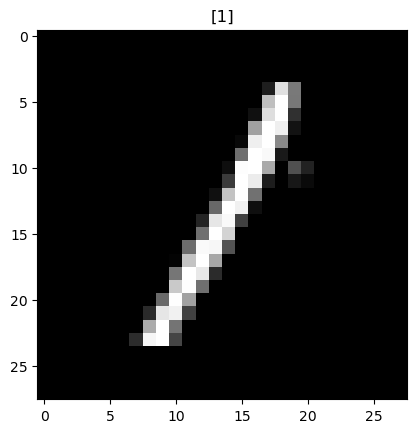

In [24]:
import numpy as np
import matplotlib.pyplot as plt

a = test_images[7453]

pred_prob = model.predict(np.expand_dims(a, axis=0))
print(pred_prob)

plt.imshow(a, cmap='gray')
plt.title([pred_prob.flatten().argsort()[::-1][0]])
plt.show()